In [1]:
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")

In [2]:
import os
import networkx as nx
import numpy as np
import tools.graph_processing as gp
import tools.plotly_extension as tp
import plotly.graph_objs as go
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import tools.graph_visu as gv
import slam.io as sio

In [3]:
# def compare_degree_real_simu(path_to_simu):
    
#     degree_values = 20
#     # real data
#     path_to_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs'

#     # Get the meshes
#     list_graphs = gp.load_graphs_in_list(path_to_graphs)
#     degree_list = list()
#     fig_labels = list()
#     for ind, graph in enumerate(list_graphs):
#         fig_labels.append('graph_'+str(ind))
#         gp.remove_dummy_nodes(graph)
#         print(len(graph.nodes))
#         graph.remove_edges_from(nx.selfloop_edges(graph))
#         degree_list.append(list(dict(nx.degree(graph)).values()))
#     # compute the histos
#     degree_histo = np.zeros((len(degree_list), degree_values))
#     for i_d, dist in enumerate(degree_list):
#         count = np.bincount(dist)
#         for i,c in enumerate(count):
#             degree_histo[i_d, i] += c
#         degree_histo[i_d, :] = degree_histo[i_d, :]/np.sum(count)
#     # lines for the plot
#     x = list(range(degree_values))
#     y = np.mean(degree_histo, 0)
#     y_upper = y + np.std(degree_histo, 0)
#     y_lower = y - np.std(degree_histo, 0)
#     # error plot from real data
#     fig_c = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='degree real data', color='rgb(20, 20, 200)')

#     #simulated graphs
    
#     path_to_graphs = path_to_simu  # path
    
#         # Get the meshes
#     list_graphs = gp.load_graphs_in_list(path_to_graphs)
#     degree_list = list()
#     fig_labels = list()
#     for ind, graph in enumerate(list_graphs):
#         fig_labels.append('simu_graph_'+str(ind))
#         gp.remove_dummy_nodes(graph)
#         print(len(graph.nodes))
#         graph.remove_edges_from(nx.selfloop_edges(graph))
#         degree_list.append(list(dict(nx.degree(graph)).values()))
#     # compute the histos
#     degree_histo = np.zeros((len(degree_list), degree_values))
#     for i_d, dist in enumerate(degree_list):
#         count = np.bincount(dist)
#         for i,c in enumerate(count):
#             degree_histo[i_d, i] += c
#         degree_histo[i_d, :] = degree_histo[i_d, :]/np.sum(count)
#     # lines for the plot
#     y = np.mean(degree_histo, 0)
#     y_upper = y + np.std(degree_histo, 0)
#     y_lower = y - np.std(degree_histo, 0)
#     # error plot from real data
#     fig_c2 = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='degree simus', color='rgb(200, 20, 20)')
#     fig_c.extend(fig_c2)
#     fig = go.Figure(fig_c)

In [4]:
import os
from os import listdir
from os.path import isfile, join

mypath = "./0/"

directories = listdir(mypath)
directories.sort()

print(directories[0:5])


['test', 'trials']


In [5]:
# fixed_path = './0/'
# #for file in directories:

In [6]:
def simu_node_density(path_to_graphs,file):
    
    file_template_mesh = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/template_mesh/lh.OASIS_testGrp_average_inflated.gii'
    file_sphere_mesh = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/template_mesh/ico100_7.gii'
    #simus_run = 0
    #path_to_graphs = '../data/simu_graph/noise_70,outliers_0/'+str(simus_run)+'/graphs'
    path_to_graphs = path_to_graphs
    list_graphs = gp.load_graphs_in_list(path_to_graphs)
    # path_ref_graph = '../data/simu_graph/noise_0,outliers_0/'+str(simus_run)+'/ground_truth.gpickle'
    # graph_ref = nx.read_gpickle(path_ref_graph)
    # list_graphs.append(graph_ref)

    print(len(list_graphs),file)
    # Get the meshes
    sphere_mesh = sio.load_mesh(file_sphere_mesh)
    mesh = gv.reg_mesh(sio.load_mesh(file_template_mesh))
    for graph in list_graphs:
        gp.remove_dummy_nodes(graph)
        #print(len(graph.nodes))
        gp.sphere_nearest_neighbor_interpolation(graph, sphere_mesh)

    density_map = gv.nodes_density_map(list_graphs, mesh, nb_iter=3, dt=0.5)

#     plt.figure()
#     plt.hist(density_map, bins=50)
#     plt.show()

    visb_sc = gv.visbrain_plot(mesh=mesh,
                            tex=density_map,
                            caption='density map',
                            cmap="jet",
                            clim=(0, 0.03)) #clim = cmap range, default = (min(data), max(data))



    visb_sc.preview()
    

In [11]:
directories

['noise_1000,outliers_0',
 'noise_1000,outliers_12',
 'noise_1000,outliers_16',
 'noise_1000,outliers_4',
 'noise_1000,outliers_8',
 'noise_1200,outliers_0',
 'noise_1200,outliers_12',
 'noise_1200,outliers_16',
 'noise_1200,outliers_4',
 'noise_1200,outliers_8',
 'noise_1400,outliers_0',
 'noise_1400,outliers_12',
 'noise_1400,outliers_16',
 'noise_1400,outliers_4',
 'noise_1400,outliers_8',
 'noise_200,outliers_0',
 'noise_200,outliers_12',
 'noise_200,outliers_16',
 'noise_200,outliers_4',
 'noise_200,outliers_8',
 'noise_400,outliers_0',
 'noise_400,outliers_12',
 'noise_400,outliers_16',
 'noise_400,outliers_4',
 'noise_400,outliers_8',
 'noise_600,outliers_0',
 'noise_600,outliers_12',
 'noise_600,outliers_16',
 'noise_600,outliers_4',
 'noise_600,outliers_8',
 'noise_800,outliers_0',
 'noise_800,outliers_12',
 'noise_800,outliers_16',
 'noise_800,outliers_4',
 'noise_800,outliers_8',
 'reference_0.gpickle']

In [7]:
for file in directories:
    
    degree_values = 20
    # real data
    path_to_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs'

    # Get the meshes
    list_graphs = gp.load_graphs_in_list(path_to_graphs)
    degree_list = list()
    fig_labels = list()
    for ind, graph in enumerate(list_graphs):
        fig_labels.append('graph_'+str(ind))
        gp.remove_dummy_nodes(graph)
        #print(len(graph.nodes))
        graph.remove_edges_from(nx.selfloop_edges(graph))
        degree_list.append(list(dict(nx.degree(graph)).values()))
    # compute the histos
    degree_histo = np.zeros((len(degree_list), degree_values))
    for i_d, dist in enumerate(degree_list):
        count = np.bincount(dist)
        for i,c in enumerate(count):
            degree_histo[i_d, i] += c
        degree_histo[i_d, :] = degree_histo[i_d, :]/np.sum(count)
    # lines for the plot
    x = list(range(degree_values))
    y = np.mean(degree_histo, 0)
    y_upper = y + np.std(degree_histo, 0)
    y_lower = y - np.std(degree_histo, 0)
    # error plot from real data
    fig_c = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='degree real data', color='rgb(20, 20, 200)')

    #simulated graphs
    
    path_to_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/0/'+ file +'/graphs'
        # Get the meshes
    list_graphs = gp.load_graphs_in_list(path_to_graphs)
    degree_list = list()
    fig_labels = list()
    for ind, graph in enumerate(list_graphs):
        fig_labels.append('simu_graph_'+str(ind))
        gp.remove_dummy_nodes(graph)
        #print(len(graph.nodes))
        graph.remove_edges_from(nx.selfloop_edges(graph))
        degree_list.append(list(dict(nx.degree(graph)).values()))
    # compute the histos
    degree_histo = np.zeros((len(degree_list), degree_values))
    for i_d, dist in enumerate(degree_list):
        count = np.bincount(dist)
        for i,c in enumerate(count):
            degree_histo[i_d, i] += c
        degree_histo[i_d, :] = degree_histo[i_d, :]/np.sum(count)
    # lines for the plot
    y = np.mean(degree_histo, 0)
    y_upper = y + np.std(degree_histo, 0)
    y_lower = y - np.std(degree_histo, 0)
    # error plot from real data
    fig_c2 = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='degree simus', color='rgb(200, 20, 20)')
    fig_c.extend(fig_c2)
    fig = go.Figure(fig_c)

        # fig.add_trace(go.Scatter(
        #     name=fig_labels[i_d],
        #     x=x,
        #     y=degree_histo[i_d, :],
        #     mode='lines',
        #     line=dict(color='rgb(25, 25, 180)')))

    fig.update_layout(
        yaxis_title='proportion',
        title=file,
        hovermode="x"
    )
    #fig.show(renderer="browser")
    fig.write_html('first_figure.html', auto_open=True)
    
    simu_node_density(path_to_graphs,file)

134 noise_1000,outliers_0
    Smoothing texture
  Computing Laplacian
    Computing mesh weights of type fem
    -edge length threshold needed for  0  values =  0.0  %
    -number of Nan in weights:  0  =  0.0  %
    -number of Negative values in weights:  16032  =  6.5234375  %
    -nb Nan in Laplacian :  0
    -nb Inf in Laplacian :  0


BrainObj(name='gui') created


0
1
2
    OK


KeyboardInterrupt: 

In [3]:
small_trials_path = "./small_trials/0/noise_100,outliers_0/graphs/graph_0.gpickle"

In [4]:
test_g = nx.read_gpickle(small_trials_path)

In [8]:
pos = nx.spring_layout(test_g)

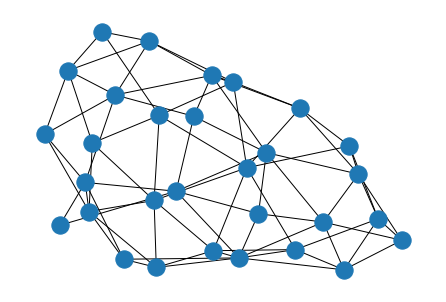

In [35]:
nx.draw(test_g)